In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
games = pd.read_csv('..\\data\\game.csv')
teams = pd.read_csv('..\\data\\Team Summaries.csv')

In [9]:
games.game_date = pd.to_datetime(games.game_date)
games = games[games.game_date.dt.year >= 2000]
scores = games[['game_date','team_abbreviation_home','pts_home', 'team_abbreviation_away', 'pts_away', 'season_type' ]]

scores = scores.rename(columns={'team_abbreviation_home':'team', 'pts_home':'pts', 'team_abbreviation_away':'opponent', 'pts_away':'opp_pts'})

In [11]:
scores.season_type.unique()

array(['Regular Season', 'All-Star', 'All Star', 'Playoffs', 'Pre Season'],
      dtype=object)

In [35]:
spurs=scores[(scores.team == 'SAS') | (scores.opponent == 'SAS')]
spurs=spurs[(spurs.season_type == 'Regular Season') | (spurs.season_type == 'Playoffs')]

temp={'game_date':[],'team':[],'score':[],'season':[] ,'season_type':[]}
for index, row in spurs.iterrows():
    if row.team == 'SAS':
        temp['team'].append(row.team)
        temp['score'].append(row.pts)
    else:
        temp['team'].append(row.opponent)
        temp['score'].append(row.opp_pts)

    if row.season_type == 'Regular Season':
        temp['season_type'].append(0)
    else:
        temp['season_type'].append(1)

    if row.game_date.month >= 10:
        temp['season'].append(row.game_date.year + 1)
    else: 
        temp['season'].append(row.game_date.year)

    temp['game_date'].append(row.game_date)

spurs = pd.DataFrame(temp)
spurs.score = spurs.score.astype(int)
spurs


,game_date,team,score,season,season_type
0,2000-01-04,SAS,88,2000,0
1,2000-01-05,SAS,96,2000,0
2,2000-01-07,SAS,102,2000,0
3,2000-01-08,SAS,127,2000,0
4,2000-01-10,SAS,93,2000,0
...,...,...,...,...,...
2044,2023-04-02,SAS,142,2023,0
2045,2023-04-04,SAS,94,2023,0
2046,2023-04-06,SAS,129,2023,0
2047,2023-04-08,SAS,131,2023,0


In [36]:
spurs.isna().sum()

game_date      0
team           0
score          0
season         0
season_type    0
dtype: int64

In [37]:
spurs.to_csv('..\\data\\spurs.csv', index=False)

In [38]:
spurs = pd.read_csv('..\\data\\spurs.csv')
spurs.game_date = pd.to_datetime(spurs.game_date)

In [39]:
spurs=spurs[(spurs['season']>2010) & (spurs['season']<2015)]

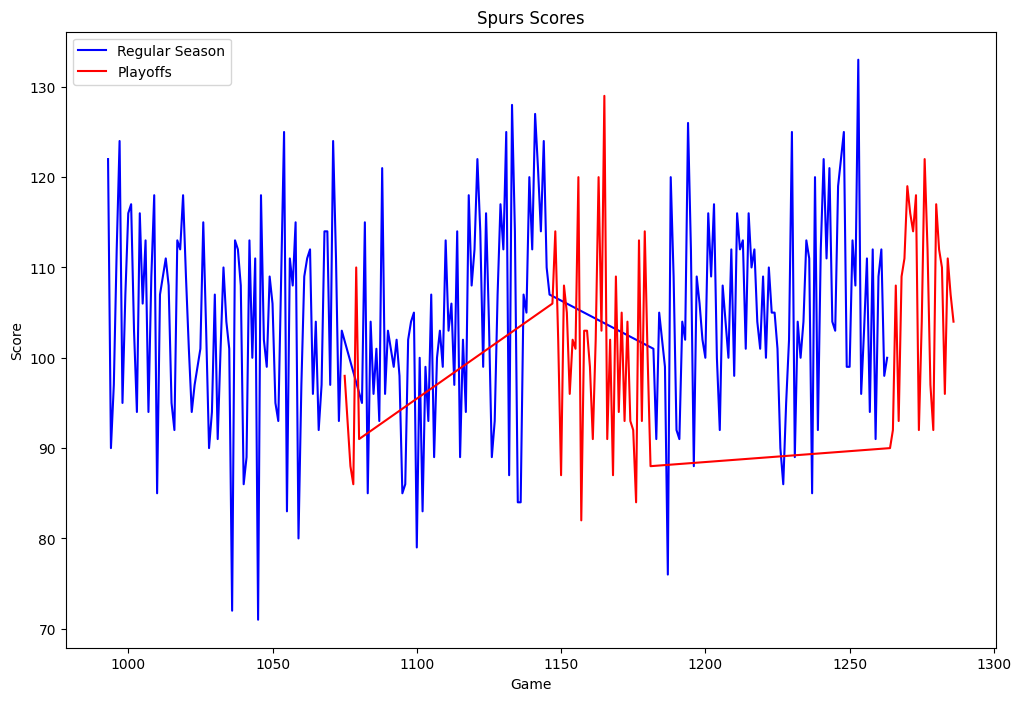

In [40]:
plt.figure(figsize=(12, 8))
plt.title('Spurs Scores')
plt.ylabel('Score')
plt.xlabel('Game')
plt.plot(spurs[spurs['season_type']==0].index, spurs[spurs['season_type']==0].score, color='blue', label='Regular Season')
plt.plot(spurs[spurs['season_type']==1].index, spurs[spurs['season_type']==1].score, color='red', label='Playoffs')
plt.legend()
plt.show()


<AxesSubplot: >

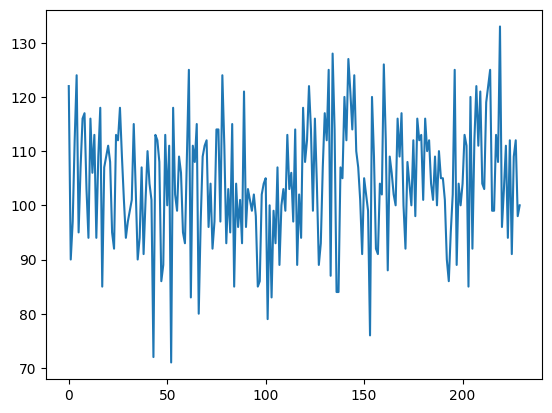

In [43]:
spurs = spurs[spurs['season_type']==0].reset_index(drop=True)
spurs.score.plot()